<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\c'
C:\Users\DELL\AppData\Local\Temp\ipykernel_8364\871287305.py:8: SyntaxWarning: invalid escape sequence '\s'
  sam = sam_model_registry["vit_h"](checkpoint="models\sam_vit_h_4b8939.pth")
C:\Users\DELL\AppData\Local\Temp\ipykernel_8364\871287305.py:12: SyntaxWarning: invalid escape sequence '\c'
  image_path = 'data\coordinate_55.0149809,-1.6224566_images\street_view_0.jpg'


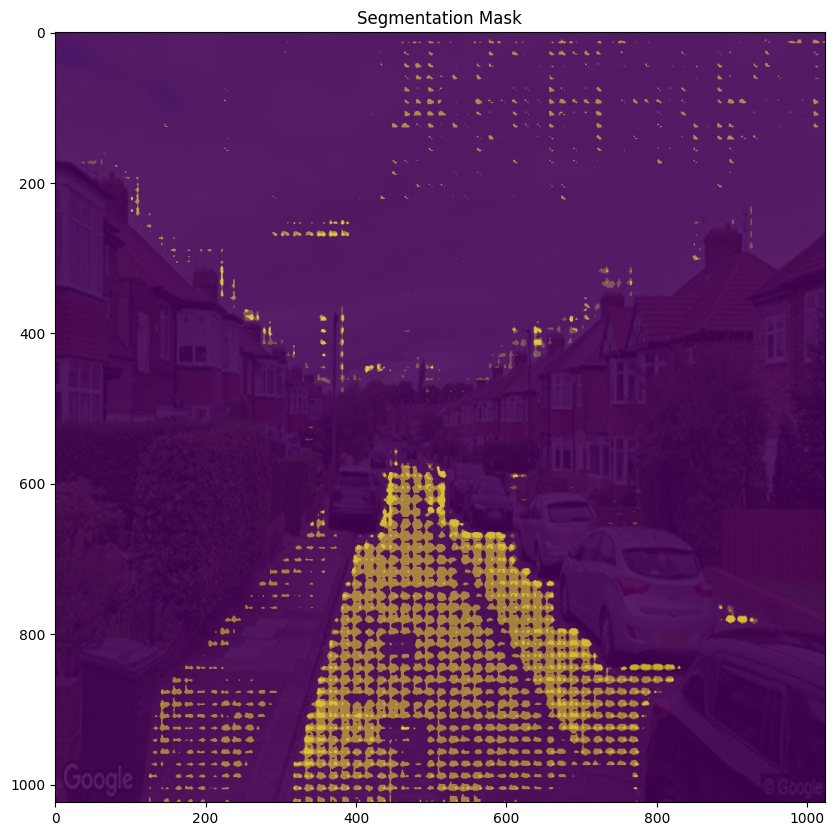

In [2]:
import torch
from segment_anything import sam_model_registry, SamPredictor
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load the pre-trained SAM model
sam = sam_model_registry["vit_h"](checkpoint="models\sam_vit_h_4b8939.pth")
predictor = SamPredictor(sam)

# Load and preprocess the image
image_path = 'data\coordinate_55.0149809,-1.6224566_images\street_view_0.jpg'
image = Image.open(image_path).convert("RGB")
image = image.resize((1024, 1024))
image = np.array(image)

# Run segmentation
predictor.set_image(image)
masks, _, _ = predictor.predict()

# Visualize the segmentation
plt.figure(figsize=(10, 10))
plt.imshow(image)
for mask in masks:
    plt.imshow(mask, alpha=0.5)
plt.title("Segmentation Mask")
plt.show()


<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\c'
C:\Users\DELL\AppData\Local\Temp\ipykernel_8364\3387896250.py:7: SyntaxWarning: invalid escape sequence '\s'
  sam = sam_model_registry["vit_h"](checkpoint="models\sam_vit_h_4b8939.pth")
C:\Users\DELL\AppData\Local\Temp\ipykernel_8364\3387896250.py:11: SyntaxWarning: invalid escape sequence '\c'
  image_path = 'data\coordinate_55.0149809,-1.6224566_images\street_view_0.jpg'


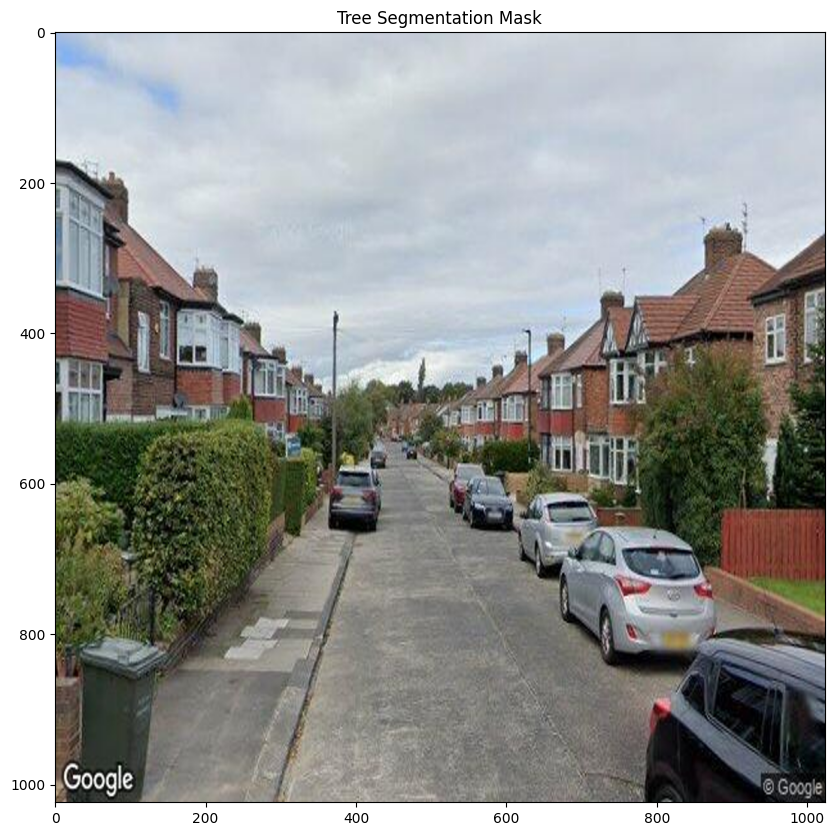

In [3]:
import torch
from segment_anything import sam_model_registry, SamPredictor
from PIL import Image
import matplotlib.pyplot as plt

# Load the pre-trained SAM model
sam = sam_model_registry["vit_h"](checkpoint="models\sam_vit_h_4b8939.pth")
predictor = SamPredictor(sam)

# Load and preprocess the image
image_path = 'data\coordinate_55.0149809,-1.6224566_images\street_view_0.jpg'
image = Image.open(image_path).convert("RGB")
image = image.resize((1024, 1024))
image = np.array(image)

# Run segmentation and filter for trees
predictor.set_image(image)
masks, scores, logits = predictor.predict()

# Define a function to filter tree masks (e.g., based on size, shape, or score)
def filter_tree_masks(masks, scores):
    tree_masks = []
    for i, mask in enumerate(masks):
        if scores[i] > 0.5:  # Adjust the threshold as needed
            tree_masks.append(mask)
    return tree_masks

tree_masks = filter_tree_masks(masks, scores)

# Visualize the segmentation
plt.figure(figsize=(10, 10))
plt.imshow(image)
for mask in tree_masks:
    plt.imshow(mask, alpha=0.5, cmap='Greens')  # Use a green colormap for trees
plt.title("Tree Segmentation Mask")
plt.show()


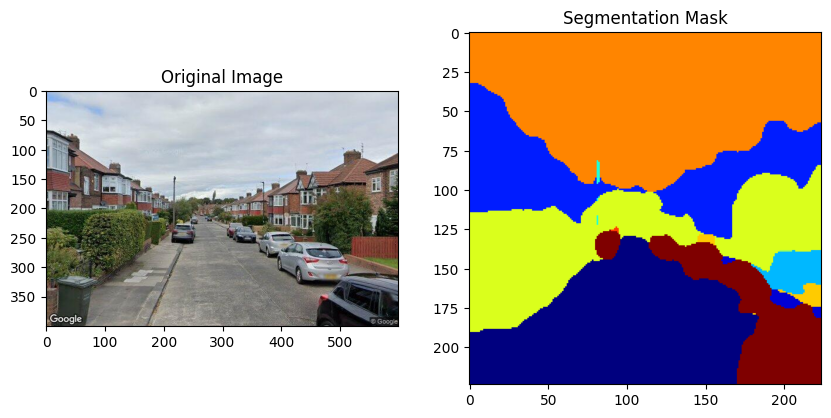

In [5]:
import onnxruntime as ort
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the ONNX model
model_path = 'models/cityscapes_fan_tiny_hybrid_224.onnx'
session = ort.InferenceSession(model_path)

# Preprocess the image
def preprocess_image(image_path):
    img = Image.open(image_path).convert("RGB")
    img = img.resize((224, 224))
    img = np.array(img).astype(np.float32)
    img = img / 255.0
    img = np.transpose(img, (2, 0, 1))  # Change to (C, H, W) format
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Run inference
def run_inference(session, img):
    input_name = session.get_inputs()[0].name
    output_name = session.get_outputs()[0].name
    result = session.run([output_name], {input_name: img})
    return result[0]

# Visualize the segmentation
def visualize_segmentation(original_image, mask):
    mask = mask.squeeze()  # Remove batch dimension
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='jet')
    plt.title("Segmentation Mask")
    plt.show()

# Load and preprocess the image
image_path = 'data/coordinate_55.0149809,-1.6224566_images/street_view_0.jpg'
original_image = Image.open(image_path).convert("RGB")
preprocessed_image = preprocess_image(image_path)

# Run inference
mask = run_inference(session, preprocessed_image)

# Visualize the results
visualize_segmentation(original_image, mask)


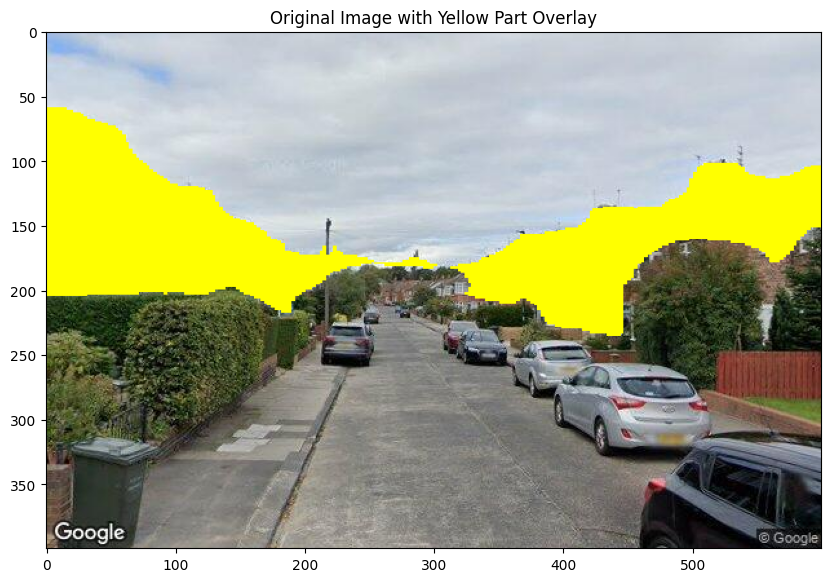

In [6]:
import onnxruntime as ort
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the ONNX model
model_path = 'models/cityscapes_fan_tiny_hybrid_224.onnx'
session = ort.InferenceSession(model_path)

# Preprocess the image
def preprocess_image(image_path):
    img = Image.open(image_path).convert("RGB")
    img = img.resize((224, 224))
    img = np.array(img).astype(np.float32)
    img = img / 255.0
    img = np.transpose(img, (2, 0, 1))  # Change to (C, H, W) format
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Run inference
def run_inference(session, img):
    input_name = session.get_inputs()[0].name
    output_name = session.get_outputs()[0].name
    result = session.run([output_name], {input_name: img})
    return result[0]

# Extract yellow part and overlay on original image
def overlay_segmentation(original_image, mask):
    mask = mask.squeeze()  # Remove batch dimension
    yellow_part = np.where(mask == 2, 1, 0)  # Assuming yellow part is labeled as class 2

    # Resize mask to original image size
    yellow_part = Image.fromarray(yellow_part.astype(np.uint8) * 255)
    yellow_part = yellow_part.resize(original_image.size, Image.NEAREST)

    # Create an alpha channel for blending
    alpha = yellow_part.convert("L")

    # Convert yellow part to RGB and color it yellow
    yellow_rgb = Image.new("RGB", original_image.size, (255, 255, 0))
    yellow_rgb.putalpha(alpha)

    # Overlay yellow part onto original image
    combined = Image.alpha_composite(original_image.convert("RGBA"), yellow_rgb)

    return combined

# Load and preprocess the image
image_path = 'data/coordinate_55.0149809,-1.6224566_images/street_view_0.jpg'
original_image = Image.open(image_path).convert("RGB")
preprocessed_image = preprocess_image(image_path)

# Run inference
mask = run_inference(session, preprocessed_image)

# Overlay segmentation onto original image
result_image = overlay_segmentation(original_image, mask)

# Visualize the results
plt.figure(figsize=(10, 10))
plt.imshow(result_image)
plt.title("Original Image with Yellow Part Overlay")
plt.show()


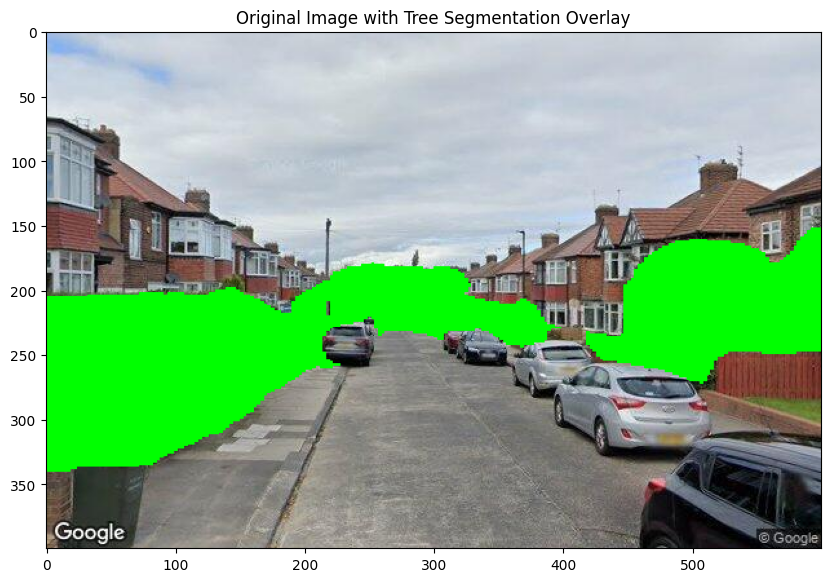

In [7]:
import onnxruntime as ort
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the ONNX model
model_path = 'models/cityscapes_fan_tiny_hybrid_224.onnx'
session = ort.InferenceSession(model_path)

# Preprocess the image
def preprocess_image(image_path):
    img = Image.open(image_path).convert("RGB")
    img = img.resize((224, 224))
    img = np.array(img).astype(np.float32)
    img = img / 255.0
    img = np.transpose(img, (2, 0, 1))  # Change to (C, H, W) format
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Run inference
def run_inference(session, img):
    input_name = session.get_inputs()[0].name
    output_name = session.get_outputs()[0].name
    result = session.run([output_name], {input_name: img})
    return result[0]

# Extract and overlay tree segmentation on the original image
def overlay_tree_segmentation(original_image, mask):
    mask = mask.squeeze()  # Remove batch dimension
    tree_class_id = 8  # Assuming trees are labeled as class 8 (please adjust if necessary)

    # Create binary mask for trees
    tree_mask = np.where(mask == tree_class_id, 1, 0)

    # Resize mask to original image size
    tree_mask = Image.fromarray(tree_mask.astype(np.uint8) * 255)
    tree_mask = tree_mask.resize(original_image.size, Image.NEAREST)

    # Create an alpha channel for blending
    alpha = tree_mask.convert("L")

    # Convert tree mask to RGB and color it green
    tree_rgb = Image.new("RGB", original_image.size, (0, 255, 0))
    tree_rgb.putalpha(alpha)

    # Overlay tree mask onto original image
    combined = Image.alpha_composite(original_image.convert("RGBA"), tree_rgb)

    return combined

# Load and preprocess the image
image_path = 'data/coordinate_55.0149809,-1.6224566_images/street_view_0.jpg'
original_image = Image.open(image_path).convert("RGB")
preprocessed_image = preprocess_image(image_path)

# Run inference
mask = run_inference(session, preprocessed_image)

# Overlay tree segmentation onto original image
result_image = overlay_tree_segmentation(original_image, mask)

# Visualize the results
plt.figure(figsize=(10, 10))
plt.imshow(result_image)
plt.title("Original Image with Tree Segmentation Overlay")
plt.show()


<>:52: SyntaxWarning: invalid escape sequence '\c'
<>:52: SyntaxWarning: invalid escape sequence '\c'
C:\Users\DELL\AppData\Local\Temp\ipykernel_8364\826816264.py:52: SyntaxWarning: invalid escape sequence '\c'
  image_path = 'data\coordinate_55.0149809,-1.6224566_images\street_view_0.jpg'


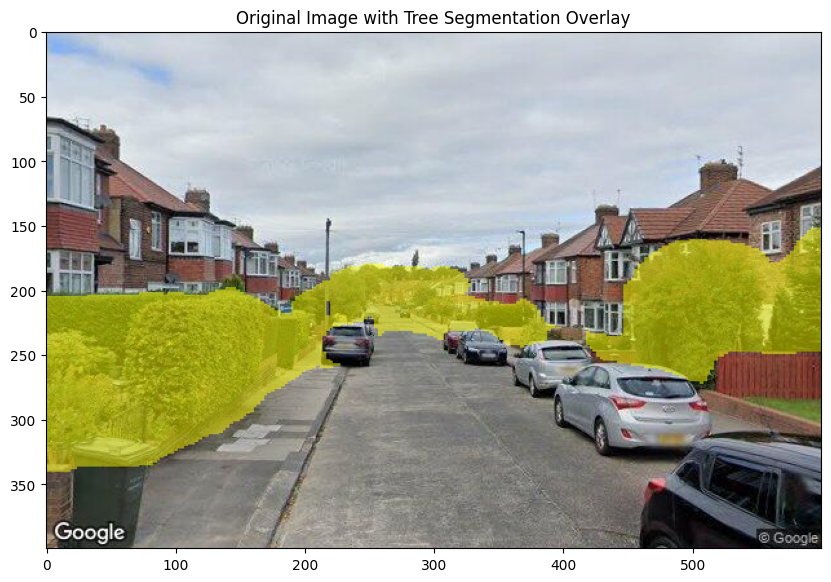

In [16]:
import onnxruntime as ort
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the ONNX model
model_path = 'models/cityscapes_fan_tiny_hybrid_224.onnx'
session = ort.InferenceSession(model_path)

# Preprocess the image
def preprocess_image(image_path):
    img = Image.open(image_path).convert("RGB")
    img = img.resize((224, 224))
    img = np.array(img).astype(np.float32)
    img = img / 255.0
    img = np.transpose(img, (2, 0, 1))  # Change to (C, H, W) format
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Run inference
def run_inference(session, img):
    input_name = session.get_inputs()[0].name
    output_name = session.get_outputs()[0].name
    result = session.run([output_name], {input_name: img})
    return result[0]

# Extract and overlay tree segmentation on the original image with faded effect
def overlay_tree_segmentation(original_image, mask):
    mask = mask.squeeze()  # Remove batch dimension
    tree_class_id = 8  # Assuming trees are labeled as class 8 (please adjust if necessary)

    # Create binary mask for trees
    tree_mask = np.where(mask == tree_class_id, 1, 0)

    # Resize mask to original image size
    tree_mask = Image.fromarray(tree_mask.astype(np.uint8) * 255)
    tree_mask = tree_mask.resize(original_image.size, Image.NEAREST)

    # Create an alpha channel with lower opacity for blending
    alpha = tree_mask.convert("L").point(lambda p: p * 0.5)  # Adjust the factor to control opacity

    # Convert tree mask to RGB and color it yellow
    tree_rgb = Image.new("RGB", original_image.size, (255, 255, 0))
    tree_rgb.putalpha(alpha)

    # Overlay tree mask onto original image
    combined = Image.alpha_composite(original_image.convert("RGBA"), tree_rgb)

    return combined

# Load and preprocess the image
image_path = 'data\coordinate_55.0149809,-1.6224566_images\street_view_0.jpg'
original_image = Image.open(image_path).convert("RGB")
preprocessed_image = preprocess_image(image_path)

# Run inference
mask = run_inference(session, preprocessed_image)

# Overlay tree segmentation onto original image with faded effect
result_image = overlay_tree_segmentation(original_image, mask)

# Visualize the results
plt.figure(figsize=(10, 10))
plt.imshow(result_image)
plt.title("Original Image with Tree Segmentation Overlay")
plt.show()


<>:52: SyntaxWarning: invalid escape sequence '\c'
<>:52: SyntaxWarning: invalid escape sequence '\c'
C:\Users\DELL\AppData\Local\Temp\ipykernel_8364\1674840439.py:52: SyntaxWarning: invalid escape sequence '\c'
  image_path = 'data\coordinate_55.0149809,-1.6224566_images\street_view_0.jpg'


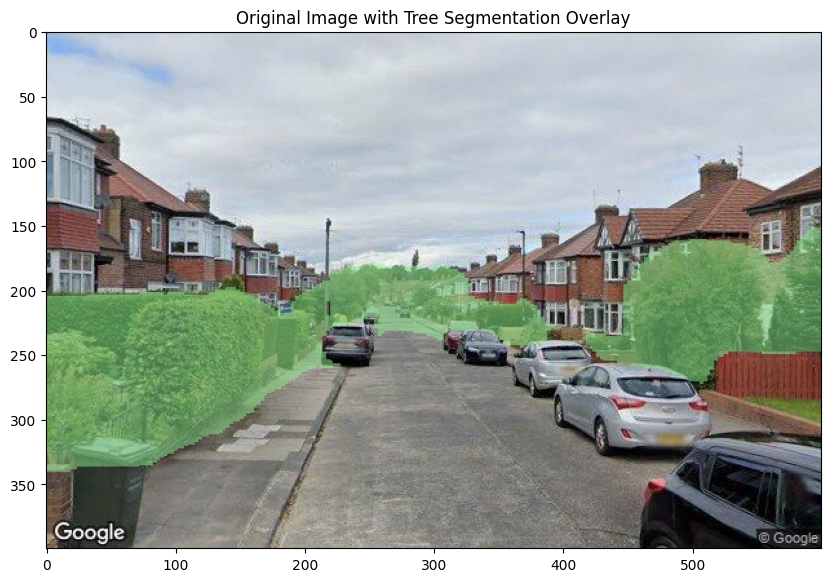

In [17]:
import onnxruntime as ort
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the ONNX model
model_path = 'models/cityscapes_fan_tiny_hybrid_224.onnx'
session = ort.InferenceSession(model_path)

# Preprocess the image
def preprocess_image(image_path):
    img = Image.open(image_path).convert("RGB")
    img = img.resize((224, 224))
    img = np.array(img).astype(np.float32)
    img = img / 255.0
    img = np.transpose(img, (2, 0, 1))  # Change to (C, H, W) format
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Run inference
def run_inference(session, img):
    input_name = session.get_inputs()[0].name
    output_name = session.get_outputs()[0].name
    result = session.run([output_name], {input_name: img})
    return result[0]

# Extract and overlay tree segmentation on the original image with faded green effect
def overlay_tree_segmentation(original_image, mask):
    mask = mask.squeeze()  # Remove batch dimension
    tree_class_id = 8  # Assuming trees are labeled as class 8 (please adjust if necessary)

    # Create binary mask for trees
    tree_mask = np.where(mask == tree_class_id, 1, 0)

    # Resize mask to original image size
    tree_mask = Image.fromarray(tree_mask.astype(np.uint8) * 255)
    tree_mask = tree_mask.resize(original_image.size, Image.NEAREST)

    # Create an alpha channel with lower opacity for blending
    alpha = tree_mask.convert("L").point(lambda p: p * 0.5)  # Adjust the factor to control opacity

    # Convert tree mask to RGB and color it light green
    tree_rgb = Image.new("RGB", original_image.size, (144, 238, 144))  # Light green color
    tree_rgb.putalpha(alpha)

    # Overlay tree mask onto original image
    combined = Image.alpha_composite(original_image.convert("RGBA"), tree_rgb)

    return combined

# Load and preprocess the image
image_path = 'data\coordinate_55.0149809,-1.6224566_images\street_view_0.jpg'
original_image = Image.open(image_path).convert("RGB")
preprocessed_image = preprocess_image(image_path)

# Run inference
mask = run_inference(session, preprocessed_image)

# Overlay tree segmentation onto original image with faded green effect
result_image = overlay_tree_segmentation(original_image, mask)

# Visualize the results
plt.figure(figsize=(10, 10))
plt.imshow(result_image)
plt.title("Original Image with Tree Segmentation Overlay")
plt.show()
